In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as sts
from scipy.stats.distributions import chi2
import seaborn as sns; sns.set()

In [0]:
raw_csv_data = pd.read_csv("IndexE8.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method="ffill")

In [0]:
df_comp["market_value"] = df_comp.ftse

In [0]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [0]:
def LLR_test(mod_1, mod_2, DF=1):
  L1 = mod_1.fit(trend='nc').llf
  L2 = mod_2.fit(trend='nc').llf
  LR = (2*(L2-L1))
  p = chi2.sf(LR, DF).round(3)
  return p

In [11]:
df["returns"] = df.market_value.pct_change(1).mul(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order = (1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 16 Mar 2020   AIC                          55215.333
Time:                        22:14:28   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


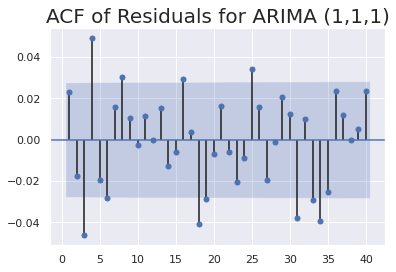

In [16]:
df["res_ar_1_i_1_ma_1"] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero=False, lags=40)
plt.title("ACF of Residuals for ARIMA (1,1,1)", size=20)
plt.show()

In [0]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order = (1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order = (1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()

model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order = (2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order = (3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()

model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order = (3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

In [22]:
print("ARIMA (1,1,1): \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)

print("ARIMA (1,1,2): \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)

print("ARIMA (1,1,3): \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)

print("ARIMA (2,1,1): \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)

print("ARIMA (3,1,1): \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)

print("ARIMA (3,1,2): \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA (1,1,1): 	 LL =  -27603.666412765342 	 AIC =  55215.332825530684
ARIMA (1,1,2): 	 LL =  -27600.081863115072 	 AIC =  55210.163726230145
ARIMA (1,1,3): 	 LL =  -27590.424032512823 	 AIC =  55192.848065025646
ARIMA (2,1,1): 	 LL =  -27599.807487862716 	 AIC =  55209.61497572543
ARIMA (3,1,1): 	 LL =  -27592.05537171564 	 AIC =  55196.11074343128
ARIMA (3,1,2): 	 LL =  -27590.660808971894 	 AIC =  55195.32161794379


In [24]:
print("LLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_2, model_ar_1_i_1_ma_3)))

LLR test p-value = 0.0


In [25]:
print("LLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_3, DF=2)))

LLR test p-value = 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


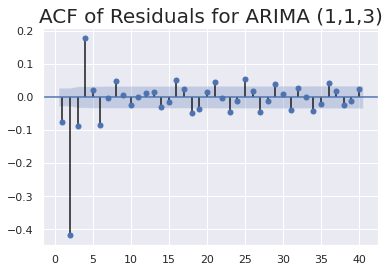

In [27]:
df["res_ar_1_i_1_ma_3"] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero=False, lags=40)
plt.title("ACF of Residuals for ARIMA (1,1,3)", size=20)
plt.show()